<a href="https://colab.research.google.com/github/garylau1/Data-analysis-and-Cleaning/blob/main/other_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import os
import tarfile

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths (update these paths as needed)
drive_path = "/content/drive/My Drive/"  # Change if files are in a subfolder
images_tar_path = os.path.join(drive_path, "images.tar.gz")
annotations_tar_path = os.path.join(drive_path, "annotations.tar.gz")

# Define extraction paths
extract_path = "/content/dataset"

# Ensure extraction directory exists
os.makedirs(extract_path, exist_ok=True)

# Function to extract tar files
def extract_tar(file_path, destination):
    with tarfile.open(file_path, "r") as tar:
        tar.extractall(path=destination)
    print(f"Extracted: {file_path} -> {destination}")

# Extract files
extract_tar(images_tar_path, extract_path)
extract_tar(annotations_tar_path, extract_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Extracted: /content/drive/My Drive/images.tar.gz -> /content/dataset
Extracted: /content/drive/My Drive/annotations.tar.gz -> /content/dataset


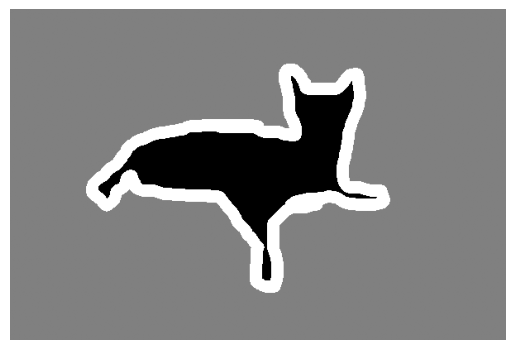

In [43]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the image path
image_path = "/content/dataset/annotations/trimaps/Abyssinian_1.png"


# Open the image
image = Image.open(image_path)

# Display the image
plt.imshow(image,cmap='gray')
plt.axis("off")  # Hide axes
plt.show()

In [33]:
import numpy as np
image_array = (np.array(image)-1)/255
image_array

array([[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157]])

In [90]:
image_dir = '/content/dataset/images'
trimap_dir = '/content/dataset/annotations/trimaps'

# List all files in each directory
image_files = os.listdir(image_dir)
trimap_files = os.listdir(trimap_dir)

# If you want to filter out only files (in case there are directories), you can use:
image_files = [image_dir+"/"+ f for f in image_files if os.path.isfile(os.path.join(image_dir, f)) and f.endswith(".jpg") ]
trimap_files = [trimap_dir+"/"+f for f in trimap_files if os.path.isfile(os.path.join(trimap_dir, f)) and not f.startswith(".")]
image_files.sort()
trimap_files.sort()
len(image_files),len(trimap_files),image_files[0:10],trimap_files[0:10]


(7390,
 7390,
 ['/content/dataset/images/Abyssinian_1.jpg',
  '/content/dataset/images/Abyssinian_10.jpg',
  '/content/dataset/images/Abyssinian_100.jpg',
  '/content/dataset/images/Abyssinian_101.jpg',
  '/content/dataset/images/Abyssinian_102.jpg',
  '/content/dataset/images/Abyssinian_103.jpg',
  '/content/dataset/images/Abyssinian_104.jpg',
  '/content/dataset/images/Abyssinian_105.jpg',
  '/content/dataset/images/Abyssinian_106.jpg',
  '/content/dataset/images/Abyssinian_107.jpg'],
 ['/content/dataset/annotations/trimaps/Abyssinian_1.png',
  '/content/dataset/annotations/trimaps/Abyssinian_10.png',
  '/content/dataset/annotations/trimaps/Abyssinian_100.png',
  '/content/dataset/annotations/trimaps/Abyssinian_101.png',
  '/content/dataset/annotations/trimaps/Abyssinian_102.png',
  '/content/dataset/annotations/trimaps/Abyssinian_103.png',
  '/content/dataset/annotations/trimaps/Abyssinian_104.png',
  '/content/dataset/annotations/trimaps/Abyssinian_105.png',
  '/content/dataset/ann

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
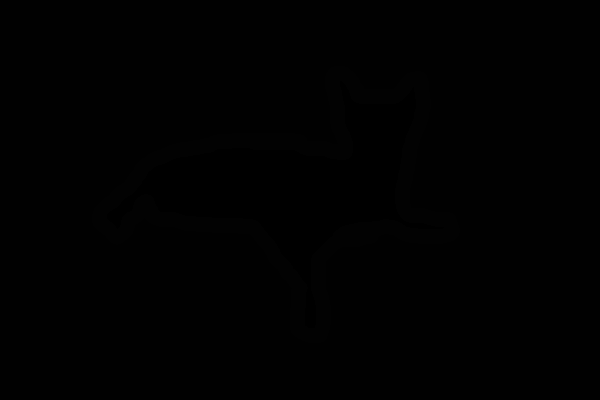

In [98]:
np.array(Image.open(trimap_files[0]))-1

The error you're encountering seems to be due to the fact that the input image is in CV_64F format, which is a 64-bit floating point, but the cv2.cvtColor() function expects an 8-bit image (uint8) or a 16-bit image (uint16)


In [455]:

import os
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2

class CustomDataset(Dataset):
    def __init__(self, image_dir, trimap_dir):
        self.image_dir = image_dir
        self.trimap_dir = trimap_dir
        self.image_names = [f for f in image_files if os.path.isfile(os.path.join(image_dir, f)) and f.endswith(".jpg") ]

        self.trimap_names = [f for f in trimap_files if os.path.isfile(os.path.join(trimap_dir, f)) and not f.startswith(".")]
        self.image_names.sort()
        self.trimap_names.sort()

        self.transform = transform

    def __len__(self):
        return len(self.image_names)
    def mask(self,image):
        image_array = (np.array(image)-1)
        return image_array

    def get_transform(self,all=True):
      if all:
        transform = A.Compose([
        A.Resize(128, 128),  # Resize images and masks to 128x128

        A.HorizontalFlip(p=0.5),
        #ToTensorV2() # Convert images and masks to torch tensors
        ])  # This makes sure the mask is handled separately as a mask
      else:
        transform = A.Compose([
        #A.Resize(128, 128),
        #A.HorizontalFlip(p=0.5),  # Random horizontal flip
        A.RandomBrightnessContrast(p=0.2),  # Random brightness and contrast
        A.CLAHE(p=0.3),
        A.AdditiveNoise(
        noise_type="uniform",  # Use uniform noise distribution
        spatial_mode="constant",  # Apply constant noise across channels
        noise_params={"ranges": [(-0.05, 0.05)]},  # Small range for noise
        p=0.2  # Apply with probability of 0.2
        ),
        ToTensorV2()
          # Convert images and masks to torch tensors
        ])

      return transform

    def __getitem__(self, idx):
        image_name = self.image_names[idx]
        trimap_names = self.trimap_names[idx]
        image_path = os.path.join(self.image_dir, image_name)
        trimap_path = os.path.join(self.trimap_dir, trimap_names)  # Assuming trimap files have the same name as images
        #
        image = np.array(Image.open(image_path).convert("RGB").resize((128, 128)))
        #image = np.resize(image, (128, 128, 3))
        trimap = Image.open(trimap_path).convert("L").resize((128, 128))  # Convert trimap to grayscale
        trimap = self.mask(trimap)
        #trimap = np.resize(image, (128, 128))
        if True:
            transform_all = self.get_transform(True)
            augmented = transform_all(image=image, mask=trimap)
            image = augmented['image']
            trimap = augmented['mask']

            transform_some = self.get_transform(False)
            augmented = transform_some(image=image, mask=trimap)
            image = augmented['image']
            trimap = augmented['mask']

        return image/255.0, trimap.long()


In [456]:


# Example usage:
transform = get_transform()

dataset = CustomDataset(
    image_dir='/content/dataset/images',
    trimap_dir='/content/dataset/annotations/trimaps',

)

In [457]:
dataset[10]

(tensor([[[0.6000, 0.5961, 0.6431,  ..., 0.0000, 0.0000, 0.0000],
          [0.5961, 0.6000, 0.6471,  ..., 0.0000, 0.0000, 0.0000],
          [0.5961, 0.6000, 0.6510,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.3294, 0.3686, 0.3569,  ..., 0.2275, 0.0706, 0.2275],
          [0.3725, 0.3725, 0.3765,  ..., 0.0667, 0.1059, 0.0784],
          [0.4078, 0.3882, 0.3843,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.5059, 0.5020, 0.5176,  ..., 0.0000, 0.0000, 0.0000],
          [0.5059, 0.5059, 0.5216,  ..., 0.0000, 0.0000, 0.0000],
          [0.5059, 0.5098, 0.5216,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.2549, 0.2902, 0.2784,  ..., 0.1961, 0.0471, 0.2000],
          [0.3020, 0.2902, 0.2980,  ..., 0.0431, 0.0784, 0.0431],
          [0.3255, 0.3137, 0.3020,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.4824, 0.4745, 0.4706,  ..., 0.0471, 0.0471, 0.0471],
          [0.4784, 0.4784, 0.4745,  ..., 0.0471, 0.0471, 0.0471],
          [0.4824, 0.4745, 0.4745,  ...,

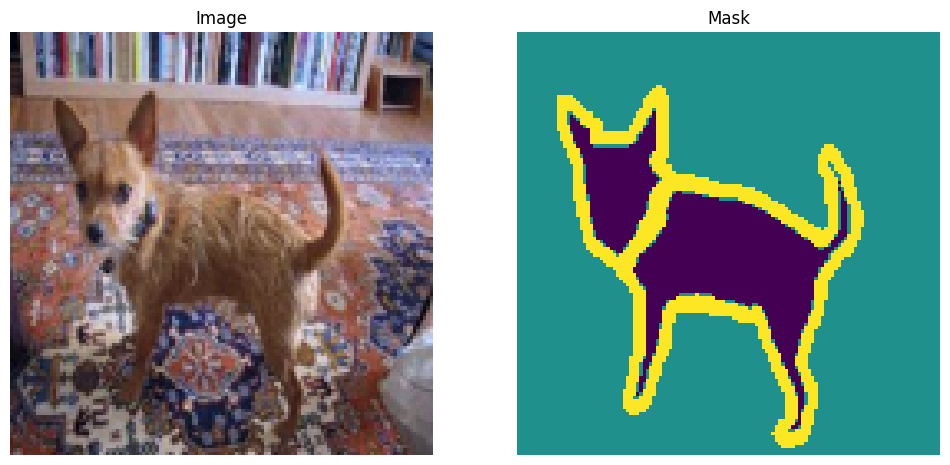

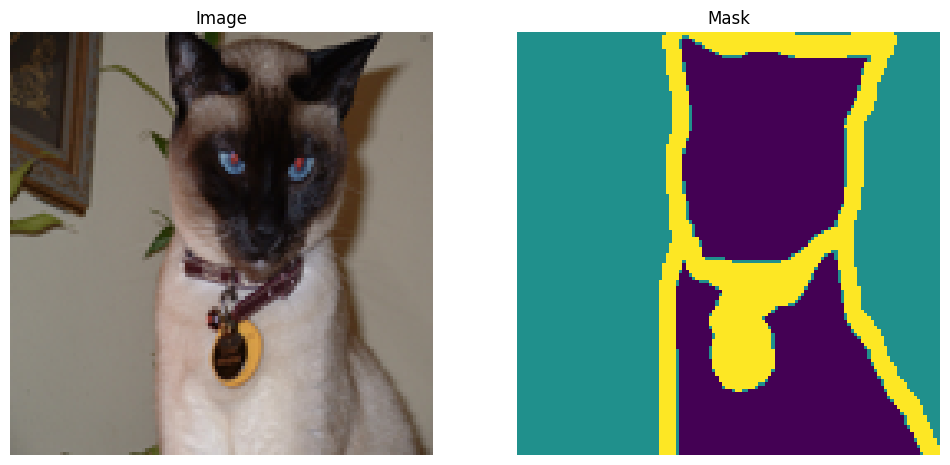

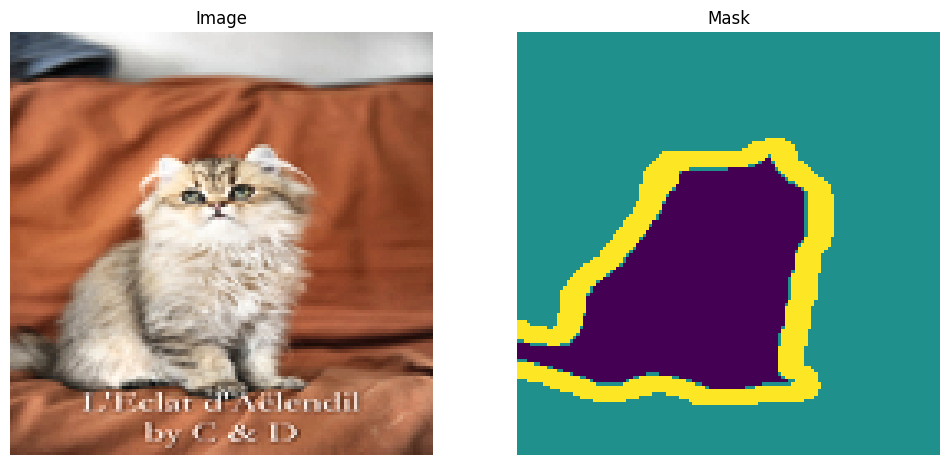

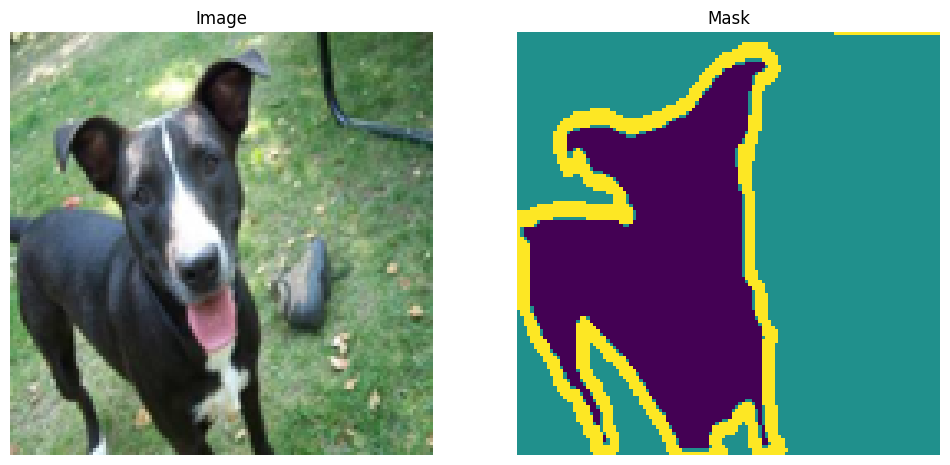

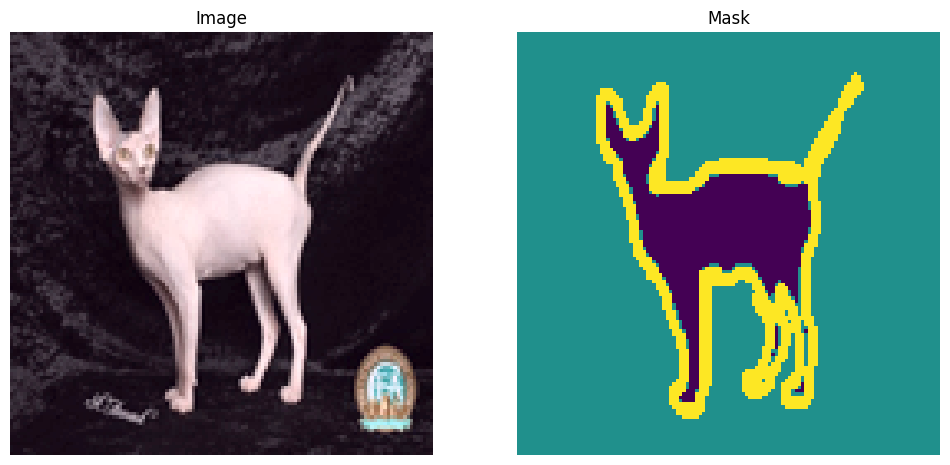

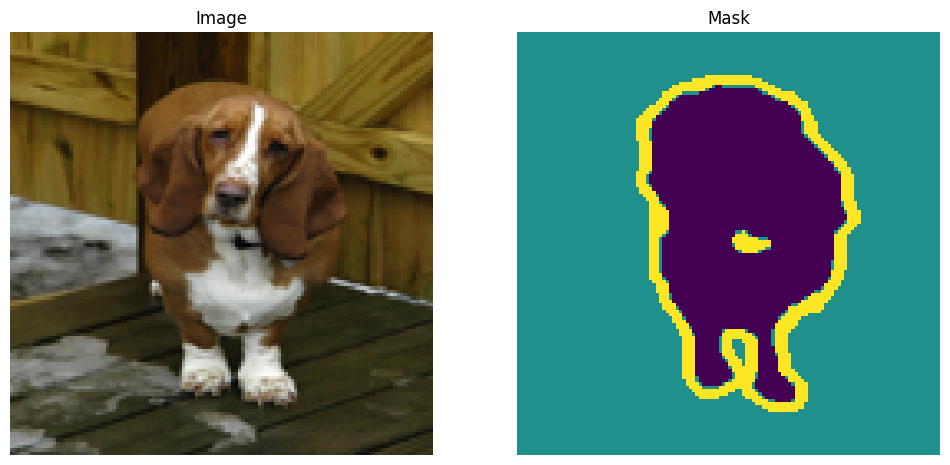

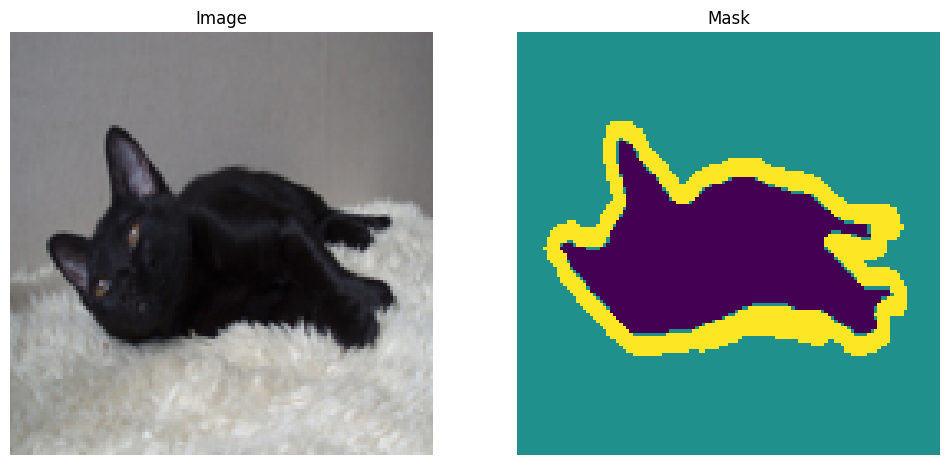

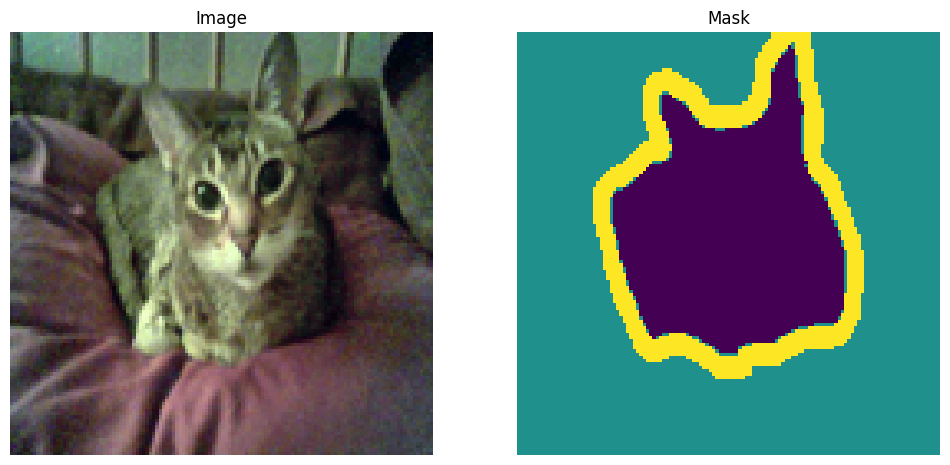

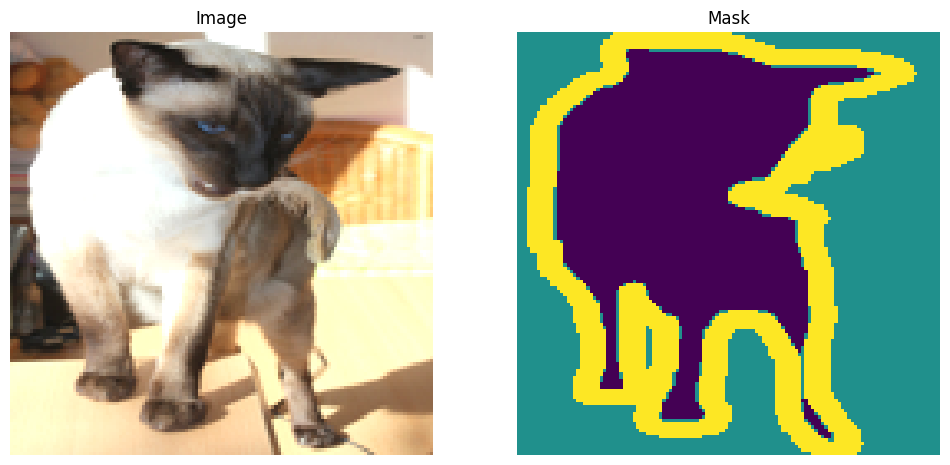

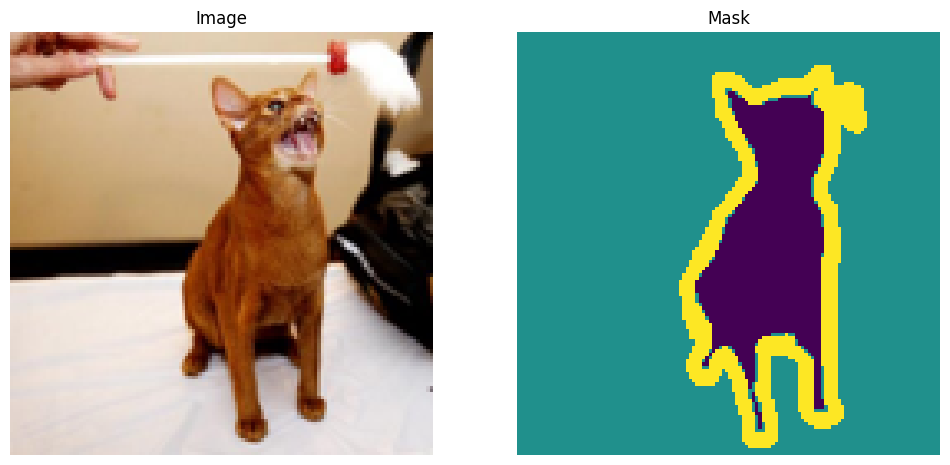

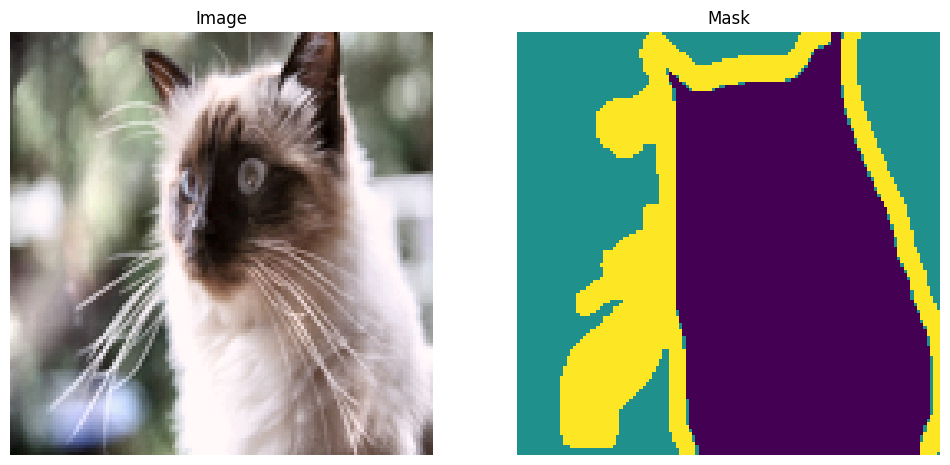

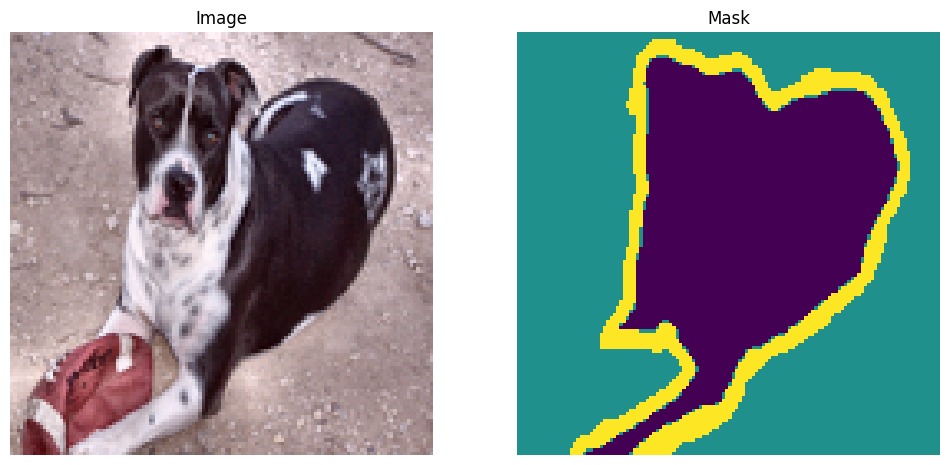

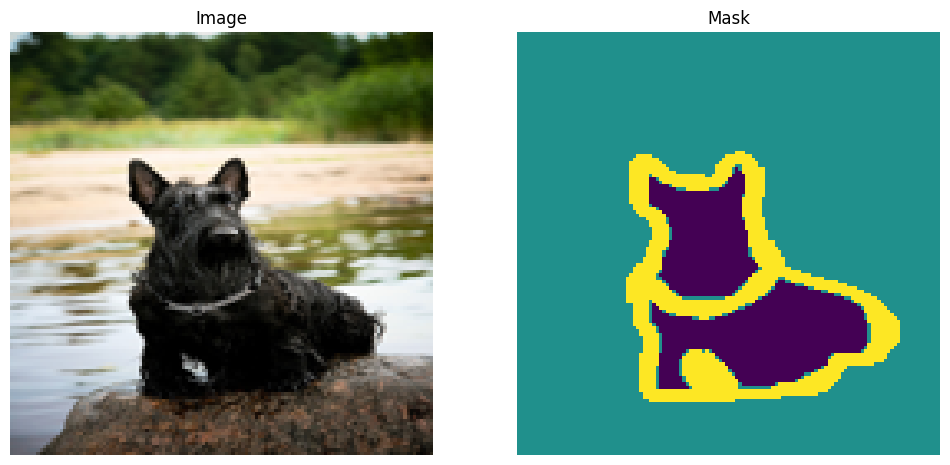

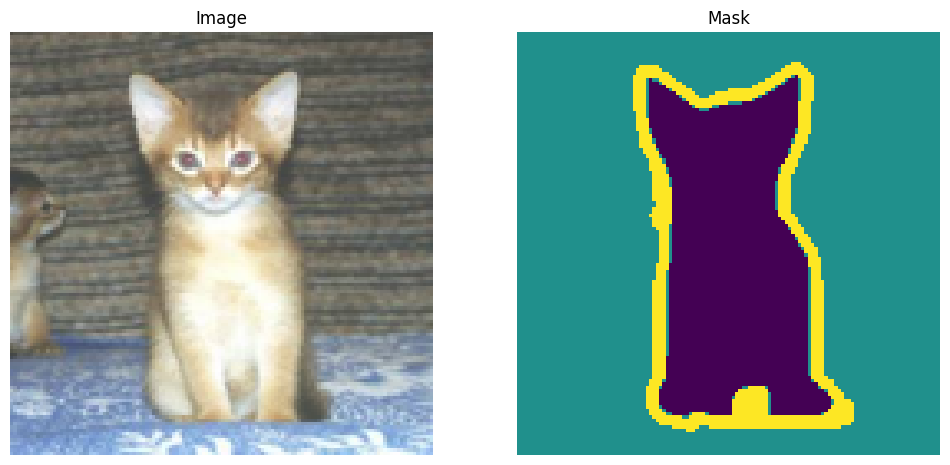

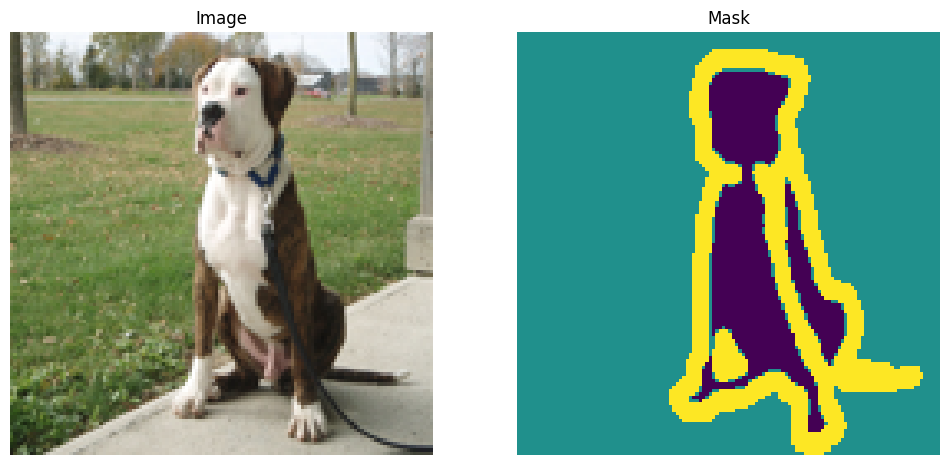

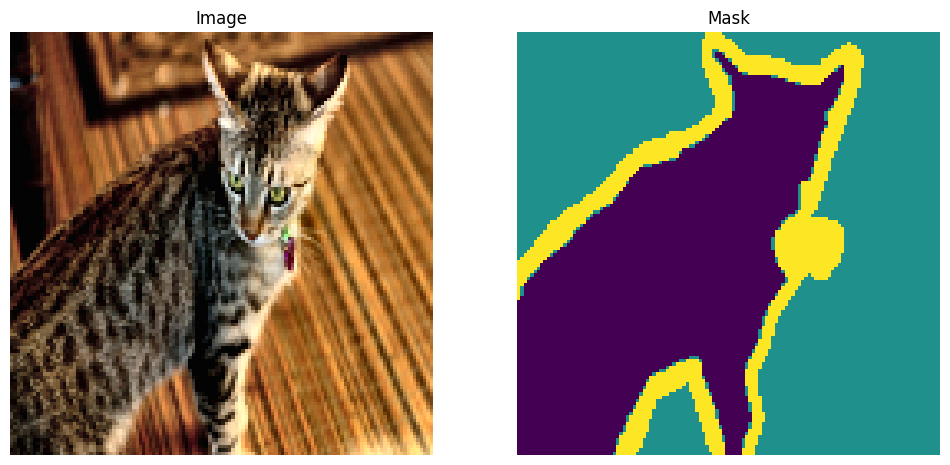

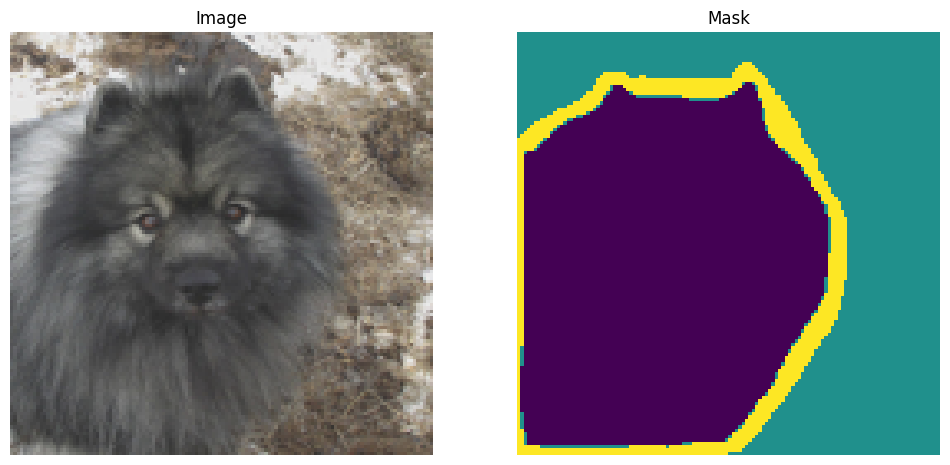

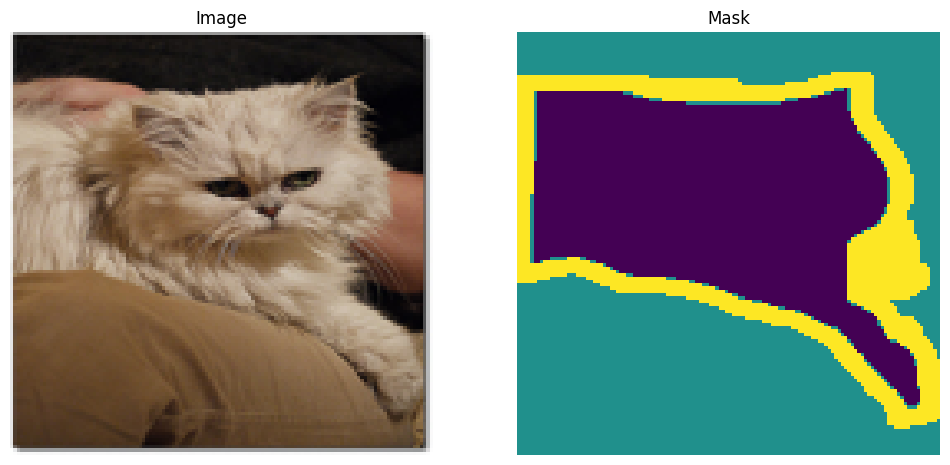

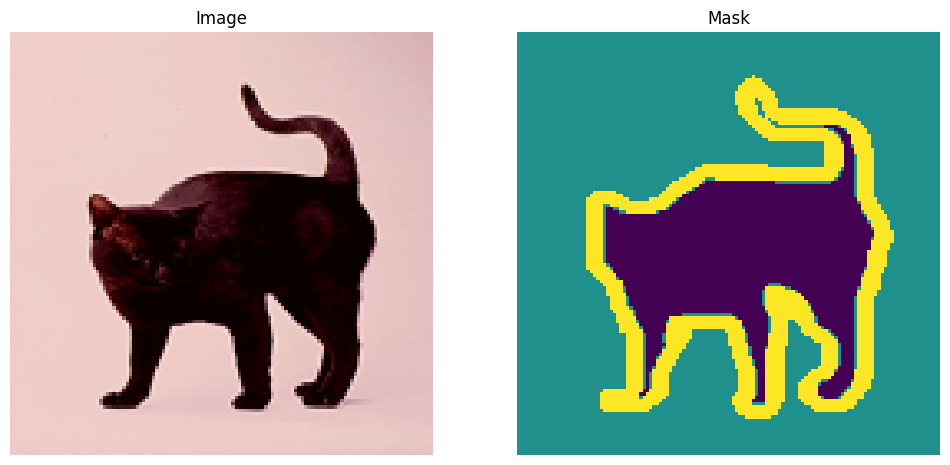

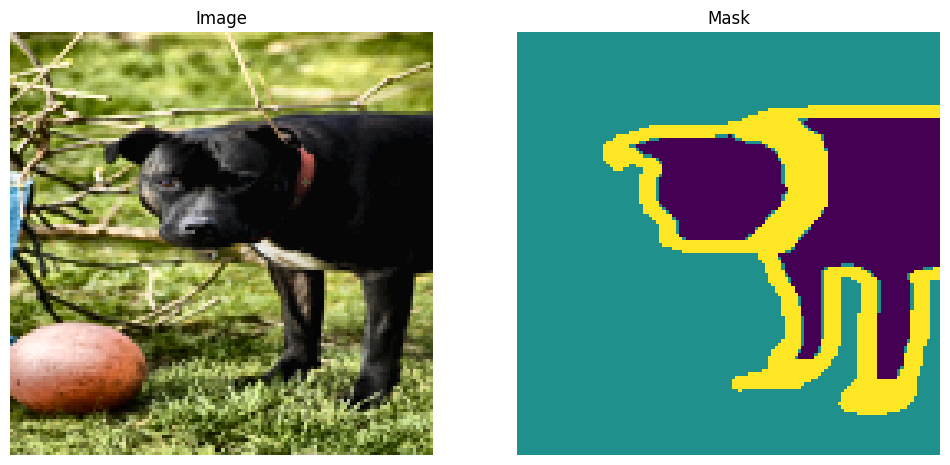

In [459]:
import matplotlib.pyplot as plt
import random
for i in [random.choice(range(len(dataset))) for _ in range(20)]:
    # Create a subplot with 1 row and 2 columns
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed
    a=dataset[i]
    # Plot the image on the first subplot
    ax[0].imshow(a[0].permute(1,2,0).numpy())
    ax[0].axis('off')  # Hide axes for the image
    ax[0].set_title("Image")  # Title for the image

    # Plot the mask on the second subplot
    ax[1].imshow(a[1].numpy())
    ax[1].axis('off')  # Hide axes for the mask
    ax[1].set_title("Mask")  # Title for the mask

    # Show the figure
    plt.show()

In [425]:
from torch.utils.data import DataLoader, random_split

# Calculate the split sizes
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Split the dataset into training and testing
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)